In [56]:
import numpy as np
from scipy.stats import moment
import matplotlib.pyplot as plt
from numpy import linalg as LA
import numpy.polynomial.polynomial as pol

class ARModel:
    @property
    def CharRoots(self, plot=False):
        if plot:
            pass
        return self._char_roots
    
    def __init__(self, theta, var_noise):
        self._theta = theta
        self._p = len(theta)
        
        self._var_noise = var_noise
        self._simulations = None
        
        self._coefficients = [1.0] + [-theta for theta in self._theta]
        self._char_roots = pol.polyroots(self._coefficients)        
     
    def is_stationary(self):
        for char_root in self._char_roots:
            if LA.norm(char_root) <= 1.0:
                return False
            
        return True
    
    def compute_moments(self, nb_moments, plot=False):
        if self._simulations is None:
            raise Exception('Simulation has not been perfomed!')
        
        nb_times = len(self._simulations[0])
        moments = np.zeros((nb_moments, nb_times))
        
        for iMoment in range(1, nb_moments+1):
            for iTime in range(0, nb_times):
                moments[iMoment-1,iTime] = moment(self._simulations[:,iTime], moment=iMoment)
            
            if plot:
                plt.plot(moments[iMoment-1], color='red', label='{0}-th moment'.format(iMoment))
                plt.legend()
                plt.show()
                
        return moments                            
    
    def simulate(self, nb_simus, nb_times, x_0, plot=False):
        assert len(x_0) == self._p, 'List of initial values must contain exact {0} elements!'
        
        simulations = np.zeros((nb_simus,nb_times))
        
        noise =  np.random.normal(.0, self._var_noise, nb_times*nb_simus)
        
        for iSimu in range(0, nb_simus):                        
            for iTime in range(0, self._p):
                simulations[iSimu,iTime]=x_0[iTime]
            
            for iTime in range(self._p, nb_times):                
                
                for iP in range(0, self._p):
                    simulations[iSimu,iTime] += self._theta[iP]*simulations[iSimu,iTime-1-iP]
                    
                simulations[iSimu,iTime] += noise[iTime+iSimu*nb_times]
                
        self._simulations = simulations
        
        if plot:
            plt.plot(simulations[0], color='red', label='AR path')
            plt.legend()
            plt.show()
        
        return simulations
                    
        

Examples for AR(2)

Is AR_2_0 stationary: True


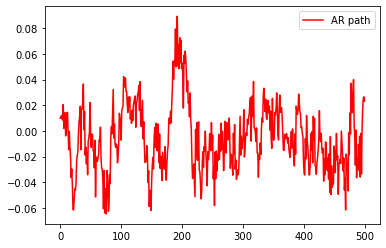

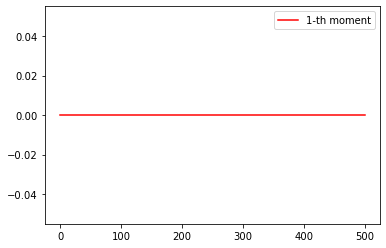

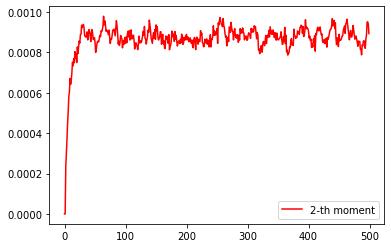

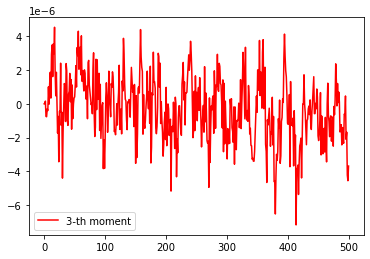

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.32697223e-04, ...,
         9.52249600e-04,  9.39771912e-04,  8.93287475e-04],
       [ 0.00000000e+00,  0.00000000e+00,  1.59203153e-07, ...,
        -4.21380049e-06, -4.54803409e-06, -3.67973332e-06]])

In [59]:
nb_simus = 1000
nb_times = 500

x_0 = [.01, .01]
ar_2_0 = ARModel([.5, .4], .015)

is_stationary = ar_2_0.is_stationary()
print('Is AR_2_0 stationary: {0}'.format(is_stationary))

simulations = ar_2_0.simulate(nb_simus, nb_times, x_0, True)

ar_2_0.compute_moments(3, True)

Is AR_2_1 stationary: True


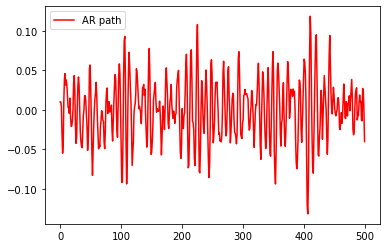

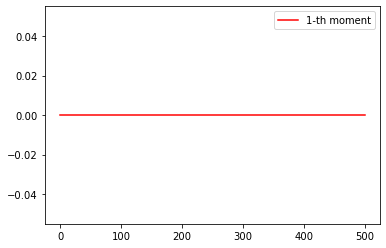

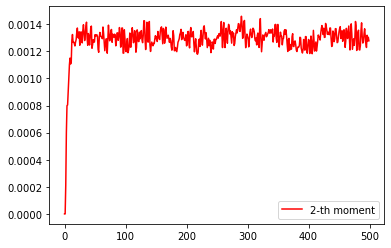

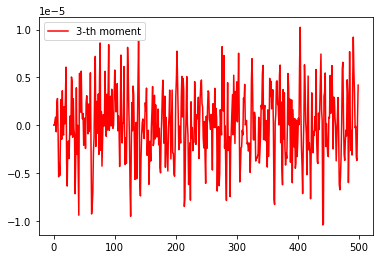

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.14104590e-04, ...,
         1.27668617e-03,  1.30457178e-03,  1.27813683e-03],
       [ 0.00000000e+00,  0.00000000e+00,  4.99455219e-07, ...,
        -3.68958635e-06,  8.57116337e-07,  4.18597791e-06]])

In [60]:
x_0 = [.01, .01]
ar_2_1 = ARModel([1.3, -.8], .015)

is_stationary = ar_2_1.is_stationary()
print('Is AR_2_1 stationary: {0}'.format(is_stationary))

simulations = ar_2_1.simulate(nb_simus, nb_times, x_0, True)

ar_2_1.compute_moments(3, True)